Connecting boazmohar@mesoscale-activity.datajoint.io:3306


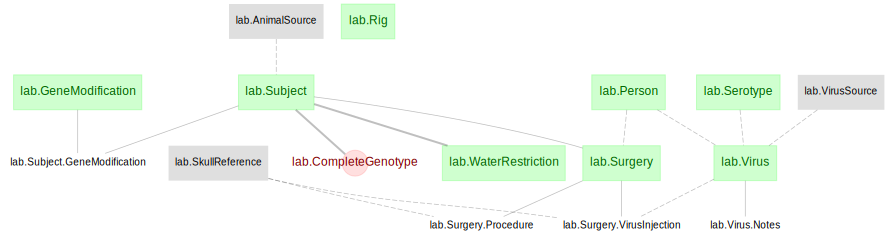

In [1]:
%matplotlib inline
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'boazmohar'
dj.config['database.password'] = 'rodent-research'
# dj.config['database.host'] = 'localhost'
# dj.config['database.user'] = 'root'
# dj.config['database.password'] = 'tutorial'
dj.conn()
import lab
dj.ERD(lab)

In [2]:
def dropdbs():
    print('dropping databases: \n\n')
    for d in ['experiment', 'lab',]:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))


In [3]:
from lab import *
s = Subject()
s.insert1((394215, 123456, '2017-02-05', 'M', 'Jackson Labs'))
s.insert1((394220, 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((394219, 123456, '2017-02-05', 'F', 'Jackson Labs'))
s.insert1((397353, 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397354, 123456, '2017-06-06', 'M', 'Jackson Labs'))
s.insert1((397357, 123456, '2017-06-06', 'F', 'Jackson Labs'))
s.insert1((388614, 123456, '2017-04-15', 'M', 'Jackson Labs'))

# 
wr = WaterRestriction()
wr.insert1((394215,70, 345678, '2017-01-01', 20.3))
wr.insert1((394220,71, 345678, '2017-01-01', 20.3))
wr.insert1((394219,72, 345678, '2017-01-01', 20.3))
wr.insert1((397353,73, 345678, '2017-01-01', 20.3))
wr.insert1((397354,74, 345678, '2017-01-01', 20.3))
wr.insert1((397357,75, 345678, '2017-01-01', 20.3))
wr.insert1((388614,76, 345678, '2017-01-01', 20.3))

lab.Person().insert1(('boazmohar', 'Boaz Mohar'))

se = Serotype()
se.insert([('AAV2/1',), ('SL1',),('Rabies',),('Adenovirus',),
           ('AAV9',),('AAV2/10',),('AAV8',),('AAV2/8',),('AAV2/5',),('AAV2/2',)])

v = Virus()
v.insert1((148, 'upenn', 'AAV2/1', 'boazmohar', 'GCAMP6f',1.3e13, '2018-01-08','good'))
v.insert1((137, 'upenn', 'AAV2/1', 'boazmohar','CRE',1.2e13, '2018-01-08','good'))
v.insert1((149, 'upenn', 'AAV2/1', 'boazmohar','GCAMP6s',1.3e13, '2018-01-08','good'))
v.insert1((111, 'janelia', 'AAV2/1', 'boazmohar','GCAMP7s',1.3e13, '2018-01-08','good'))

g = GeneModification()
g.insert([('Syt17-cre', ''), ('ACTB-tTa', ''), ('Chrna2-cre', ''), ('CamK2a-tTA', ''), ('TITL-GCaMP6f', '')], skip_duplicates=True)

s_gm = Subject.GeneModification()
s_gm.insert1((388614,'Chrna2-cre', 'Unknown', 'Unknown'))

lab.Rig().insert1(('2p_spine','2c.382', 'Two Photopn high NA'))

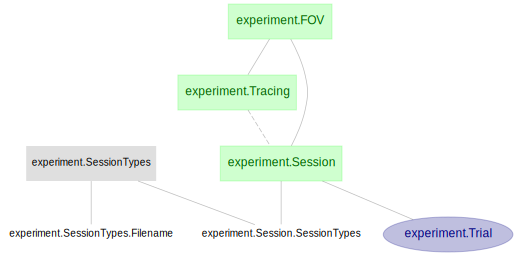

In [5]:

import experiment
dj.ERD(experiment)

In [13]:
dropdbs()

dropping databases: 


dropping experiment
dropping lab


In [6]:
from experiment import *

fov = FOV()
#70 1
fov.insert1((394215, 1, '2017-07-29', 'One injections site, nice sparsity')) 
#72 1
fov.insert1((394219, 1, '2017-08-07', 'Left FOV with more cells., there is another one more to the right and down'))
#70 2
fov.insert1((394215, 2, '2017-09-02', 'Higher expression, same Location as fov1'))
#71 1
fov.insert1((394220, 1, '2017-07-30', 'Missing in google sheets'))
#72 2
fov.insert1((394219, 2, '2017-09-02', 'same area as FOV1'))
#73 1
fov.insert1((397353, 1, '2017-09-20', 'Lower injection ISO'))
#74 1
fov.insert1((397354, 1, '2017-09-20', 'ISO'))
#76 1
fov.insert1((388614, 1, '2017-10-03', 'ISO'))
#75 1
fov.insert1((397357, 1, '2017-10-03', 'ISO'))
#75 2
fov.insert1((397357, 2, '2017-10-24', 'ISO'))
#74 2
fov.insert1((397354, 2, '2017-10-26', 'ISO'))
#74 3
fov.insert1((397354, 3, '2017-12-06', 'ISO'))
#75 3
fov.insert1((397357, 3, '2018-01-03', 'ISO'))

types = SessionTypes()
types.insert1(('Stack',))
types.insert1(('Spines',))
types.insert1(('Cellbodies',))
types.insert1(('Manual_mroi',))
types.insert1(('Vision',))
files = SessionTypes.Filename()

files.insert1(('Spines','Sp.mat'))
files.insert1(('Cellbodies','Sp.mat'))
files.insert1(('Vision','vis*.p'))
files.insert1(('Vision','*.psyexp'))

In [8]:
Tracing()

subject_id institution animal ID,fov_id,tracing_id running cell id,tracing_type,swc_name name of reconstruction swc,"comments tuning, other remarks"
388614,1,1,Cell,Cell1.swc,"270 preferred direction, center @ 25x, 35y"


In [ ]:
388614

In [5]:
import pandas as pd
import requests
import io
key='1ENbQe4QtUZ6as9y8Kcr_sHl3YpwQoAs_EScIIURefSQ'
gid='78168970'
response = requests.get('https://docs.google.com/spreadsheet/ccc?key=' + key + '&output=csv&gid=' + gid)
assert response.status_code == 200, 'Wrong status code'
f = io.StringIO(response.content.decode('utf-8'))
sessionsDF = pd.read_csv(f)
      

In [7]:
from experiment import *

In [9]:
s = Session()
s

subject_id institution animal ID,fov_id,session_id running session id,username,rig,date start date and time,run run number,excitation_wavelength in nm,power in percent,anesthesia,pitch,roll,comments
388614,1,1,boazmohar,2p_spine,2018-01-01 00:00:00,1,960,50.000,None,0.000,0.000,None


In [6]:
sessionsDF

,WR,Animal,Type,StartTime,Run,FOV,Cell,Branches,Divisions,Power,...,Switched,raw,sp,step5,database,prepared,dendrite,mask,time,Use
0,BMWR75,NaN,MROI,1/8/2018 14:30:00,1.0,3.0,Cell1,"1,2,3,10,13",45.0,60.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,0.0
1,BMWR75,NaN,MROI,1/7/2018 14:30:00,1.0,3.0,Cell1,"1, 11.3456, 4.123",45.0,60.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
2,BMWR75,NaN,Stack,1/3/2018 13:30:00,1.0,3.0,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,BMWR75,NaN,MROI,12/30/2017 15:50:00,1.0,2.0,Cell7,"1,9,14,",45.0,55.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,NaN
4,BMWR75,NaN,MROI,12/29/2017 13:50:00,1.0,2.0,Cell7,"1,54,55,56",75.0,55.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
5,BMWR75,NaN,MROI,12/28/2017 15:50:00,1.0,2.0,Cell7,"1,47,48,51.1,31,52",75.0,55.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
6,BMWR75,NaN,MROI,12/27/2017 15:50:00,1.0,2.0,Cell7,"1,36,39,42",0.0,55.0,...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,1.0
7,BMWR75,NaN,MROI,12/10/2017 10:50:00,4.0,2.0,Cell7,"1,27.3,29.12,32,35,34",75.0,50.0,...,NaN,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NaN
8,BMWR75,NaN,MROI,12/10/2017 10:50:00,3.0,2.0,Cell7,"1,27.3,29.12,32,35,34",75.0,50.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NaN
9,BMWR75,NaN,MROI,12/10/2017 10:50:00,2.0,2.0,Cell7,"1,27.3,29.12,32,35,34",75.0,50.0,...,NaN,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NaN


In [ ]:

index1 = sessionsDF.WR == self.animalID
# get the date
startTime = sessionsDF.StartTime
startTime = startTime.apply(lambda x: pd.to_datetime(x).date())
index2 = startTime == pd.to_datetime(self.date, yearfirst=True).date()
# get the run
run = int(self.run[3])
index3 = sessionsDF.Run == run
index4 = sessionsDF.Type == 'MROI'
# find the session
self.meta = sessionsDF[index1 & index2 & index3 & index4].to_dict('list')